## Bug in boost_histogram

It seems that scaling a histogram in boost_histogram <= v1.2.1 scales both the value and the variance by the same amount, where as the value should be scaled by the sum of weights and the variance scaled by (the sum of weights) squared.

Bug reported here: https://github.com/scikit-hep/boost-histogram/issues/679

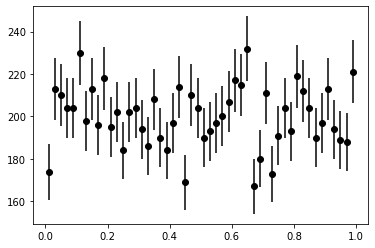

In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

h = bh.Histogram( bh.axis.Regular(50,0,1), storage=bh.storage.Weight() )

h.fill( np.random.uniform(size=10000) )

# this is what my unscaled histogram looks like (all weights are unity)
plt.errorbar( h.axes[0].centers, h.values(), h.variances()**0.5, fmt='ko' );



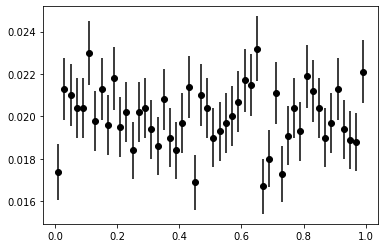

In [2]:
# save the sum of weights for the workaround below
sumw = h.sum().value

# it should be that if you re-nomormalise or scale a histogram then the 
# variance is scaled accordinly (i.e. by the sumw**2) but instead it seems
# doing this scales both the values and the variance the same (by sumw)
h /= h.sum().value

# see this plot, the scaled histogram now has the wrong errors
plt.errorbar( h.axes[0].centers, h.values(), h.variances()**0.5, fmt='ko' );

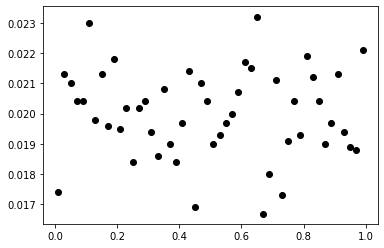

In [3]:
# temporary workaround whilst this is fixed
# now if you scale the variance by the original sum of weights again you get the correct
# relative error back again
plt.errorbar( h.axes[0].centers, h.values(), (h.variances()/sumw)**0.5, fmt='ko' );